In [2]:
import pymysql as mdb
from pprint import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_pickle('df_steam_db.pkl')
%matplotlib inline

In [3]:
'''fixing timestamps'''
df['price_date_fixed'] = df.price_date.apply(np.array)
df.price_date_fixed = df.price_date_fixed * pow(10,-3)
df.head()

,appid,formatted,fprice,iprice,price_date,sale_bool,formatted_no_holiday,sale_bool_no_holiday,saledates_no_holiday,sale_bool_all,price_date_fixed
0,2430,[],NaN,NaN,NaN,[],[],[],[],[],NaN
1,297750,"{u'1434047268000': {u'discount': 25, u'initial...","[39.99, 29.99, 39.99, 19.99, 39.99]","[39.99, 39.99, 39.99, 39.99, 39.99]","[1417120656.0, 1434047268.0, 1434994431.0, 144...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","{u'1440522322000': {u'discount': 0, u'initial'...","[[1417120656, 1418330256, 1419539856, 14207494...",[1440176720],"[[1417120656, 1418330256, 1419539856, 14207494...","[1417120.656, 1434047.268, 1434994.431, 144017..."
2,19080,"{u'1434049315000': {u'discount': 75, u'initial...","[9.99, 2.49, 9.99]","[9.99, 9.99, 9.99]","[1417120656.0, 1434049315.0, 1434996542.0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","{u'1434996542000': {u'discount': 0, u'initial'...","[[1417120656, 1418330256, 1419539856, 14207494...",[],"[[1417120656, 1418330256, 1419539856, 14207494...","[1417120.656, 1434049.315, 1434996.542]"
3,278850,"{u'1417513376000': {u'discount': 50, u'initial...","[4.99, 2.49, 4.99, 2.49, 4.99, 1.49, 4.99]","[4.99, 4.99, 4.99, 4.99, 4.99, 4.99, 4.99]","[1417120656.0, 1417513376.0, 1417545207.0, 141...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","{u'1417545207000': {u'discount': 0, u'initial'...","[[1417120656, 1418330256, 1419539856, 14207494...",[1417513376],"[[1417120656, 1418330256, 1419539856, 14207494...","[1417120.656, 1417513.376, 1417545.207, 141892..."
4,367260,"{u'1435856718000': {u'discount': 0, u'initial'...","[5.39, 5.99, 4.01, 5.99, 6.29, 6.99, 5.24, 6.99]","[5.99, 5.99, 5.99, 5.99, 6.99, 6.99, 6.99, 6.99]","[1430513702.0, 1431104712.0, 1434045990.0, 143...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","{u'1430513702000': {u'discount': 10, u'initial...","[[1417120656, 1418330256, 1419539856, 14207494...","[1435268707, 1441127115, 1430513702]","[[1417120656, 1418330256, 1419539856, 14207494...","[1430513.702, 1431104.712, 1434045.99, 1434993..."


In [4]:
def get_ists(in_times):
    '''dirty, assumes that each is a sale, which isnt 100% accurate, but close'''
    '''ists: intersaletimes'''
    times = np.array(in_times)
    if not np.array(in_times).size == 1:
        ists = in_times[1:] - in_times[:-1]
    else:
        ists = np.nan
    return ists


In [5]:
df['ists'] = df.price_date_fixed.apply(get_ists)

In [6]:
df.ists.head()

0                                                  NaN
1              [16926.612, 947.163, 5182.289, 345.602]
2                                 [16928.659, 947.227]
3    [392.72, 31.831, 1383.586, 1294.93, 13823.926,...
4    [591.01, 2941.278, 947.101, 275.616, 588.011, ...
Name: ists, dtype: object

In [7]:
df['ists_day'] = df.ists / (60*60*24)

In [8]:
df['ists_day_mean'] = df.ists_day.apply(np.mean)

In [9]:
df['ists_day_mean'].mean()

0.028310145851135029

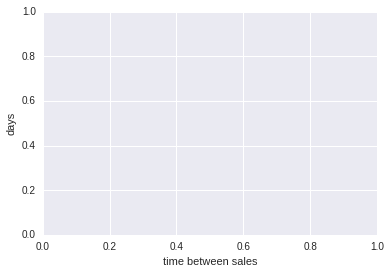

In [10]:
'''make irt list just to see'''
plt.xlabel('time between sales')
plt.ylabel('days')
ist_list = list()
for i in df.ists_day:
    if not type(i) is float:
        ist_list += list(i)

ist_arr = np.array(ist_list)


In [11]:
ist_arr[0] * 1000

195.9098611111107

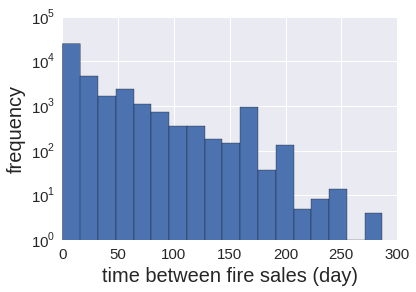

In [12]:
# the histogram of the data
n, bins, patches = plt.hist(ist_arr * 1000, 18) #x, 50, normed=1, facecolor='green', alpha=0.75)
plt.yscale('log', nonposy='clip')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# # add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('time between fire sales (day)', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)

In [13]:
ist_perserved_list = list()
for i in df.price_date_fixed:
    if not type(i) is float:
        ist_perserved_list.append(np.array(i))

[]

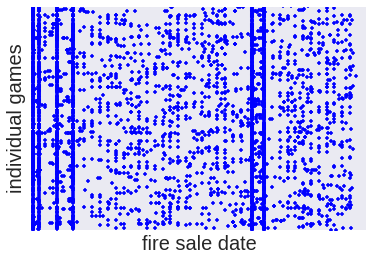

In [16]:
fig,ax = plt.subplots()

#use ist_perserved_list
for i,v in enumerate(ist_perserved_list):
    y =  np.ones(v.shape) * i
    vd = v / (60.*60.*24.)
    ax.plot(vd,y, 'b.')

ax.set_ylim([0,500])
ax.set_ylabel('individual games', fontsize = 20)
ax.set_xlabel('fire sale date', fontsize = 20)
ax.set_xticks([])
ax.set_yticks([])